**1a) Use the Breast Cancer Dataset dataset breast-cancer-wisconsin.xlsx and fill in the missing
values. Then compute the Pearson correlation between any pair of variables, and store them in a
matrix.

In [1]:
import os
os.environ["PATH"] += os.pathsep + '/usr/lib/x86_64-linux-gnu/graphviz'
import numpy as np
import matplotlib.pyplot as plt
import forcelayout as fl
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats.stats import pearsonr
from graphviz import Digraph


from numpy import cov
cancer_data = pd.read_excel("breast-cancer-wisconsin.xlsx")
cancer_data.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


code           0
thickness      0
uniCelS        0
uniCelShape    0
marAdh         0
epiCelSize     0
bareNuc        0
blaChroma      0
normNuc        0
mitoses        0
class          0
dtype: int64

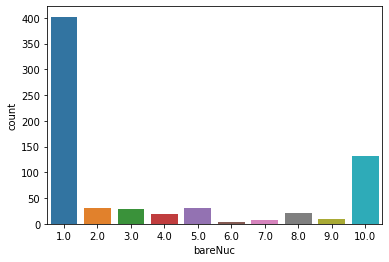

In [3]:
cancer_data.isnull().sum()
sns.countplot(cancer_data['bareNuc'])
cancer_data['bareNuc'].isnull().sum()
impute = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
data_complete = pd.DataFrame(impute.fit_transform(cancer_data))
data_complete.columns = cancer_data.columns
data_complete.index = cancer_data.index
data_complete.isnull().sum()

In [4]:
corr, _ = pearsonr(data_complete['uniCelS'], data_complete['uniCelShape'])
print('Pearsons correlation: %.3f' % corr)
covariance= np.corrcoef(data_complete['uniCelS'], data_complete['uniCelShape'])
print(covariance)

Pearsons correlation: 0.907
[[1.         0.90688191]
 [0.90688191 1.        ]]


**1b)Create a graph from the correlation matrix and visualize it with a force-directed layout. Represent
each variable as a node in the graph. Insert an edge between two variables whenever the Pearson
correlation between them exceeds the threshold ρ > 0.6.

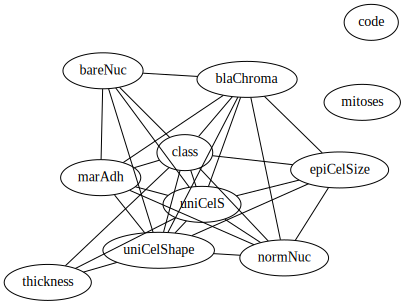

In [10]:
from graphviz import Graph
from itertools import combinations 

p= data_complete.corr(method='pearson')
g = Graph(engine='fdp')
for (colA,colB) in combinations(p.columns,2):
    g.node(colA)
    g.node(colB)
    v=p[colA][colB]
    if v >0.6:
        g.edge(colA,colB)
g

**c) Modify the visual attributes of edges to reflect the magnitude of the correlation.

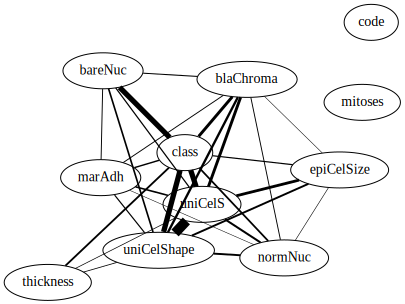

In [13]:
g = Graph(engine='fdp')
       
for (colA,colB) in combinations(p.columns,2):
    g.node(colA)
    g.node(colB)
    v=p[colA][colB]
    if v >0.6:
        w=0.5+100*(v-0.6) **2
        g.edge(colA,colB,penwidth=str(w))
g

**d) Produce an alternative visualization with a circular layout. Color the nodes so that there are four
set of nodes, one color for having at least one correlation more than 0.9 to other nodes, another for
having at least a correlation 0.8 < ρ max <= 0.9, one for having a correlation 0.6 < ρ max <= 0.8
and the last for the remaining nodes.

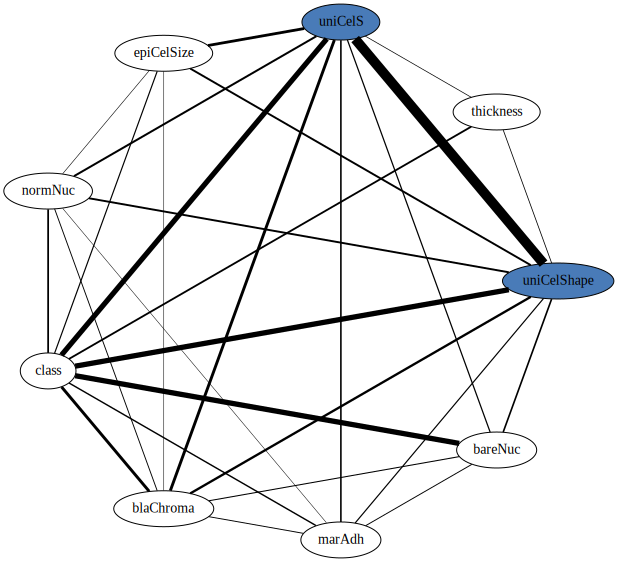

In [12]:
g = Graph(engine='circo')
       
for (colA,colB) in combinations(p.columns,2):
    if p[colA][colB] > 0.9:
        color='#497bb8'
        g.node(colA,style="filled",fillcolor=color)
        g.node(colB,style="filled",fillcolor=color)
    
for (colA,colB) in combinations(p.columns,2):
    v=p[colA][colB]
    if v >0.6:
        w=0.5+100*(v-0.6) **2
        g.edge(colA,colB,penwidth=str(w))
g

**e) Answer the following questions:
At the selected threshold, which nodes are disconnected from the rest of the graph and what
do they indicate?

Answer: From this visualization we can see 'code' and 'mitoses' do not have any edges with the other ones as the peasrson correlation coefficient is lower than the threshold 0.6.

**If two nodes A and B are strongly correlated, and node C is strongly correlated with node
B, can we conclude that node C will be also strongly correlated with node A?

Not always. class is strongly correlated with uniCelShape and bareNuc, but bareNuc is not that strongly correlated with uniCelShape

**Based on the visualization, which variables would you propose to predict the class?

Answer: I would recommend uniCels, bareNuc and uniCelShape to predit the class.